In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression as lin_reg
from sklearn.cross_validation import train_test_split
from sklearn import metrics as metrics

C:\Users\vaitnd\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#data = pd.read_csv('StudentsPerformance.csv')googleplaystore
data = pd.read_csv('C:/Users/vaitnd/Documents/GitHub/Test_Leaf/Batch1/Linear_regression/Assignment/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [205]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.shape
data.isnull().sum()
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [207]:
data.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [6]:
n = data.copy()
n.drop([ 'id', 'date', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_lot15'],  inplace=True, axis=1)
n.columns

Index(['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'sqft_living15'],
      dtype='object')

In [7]:
n.corr()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
price,1.000000,0.525138,0.702035,0.667434,0.605567,0.585379
bathrooms,0.525138,1.000000,0.754665,0.664983,0.685342,0.568634
sqft_living,0.702035,0.754665,1.000000,0.762704,0.876597,0.756420
grade,0.667434,0.664983,0.762704,1.000000,0.755923,0.713202
sqft_above,0.605567,0.685342,0.876597,0.755923,1.000000,0.731870
sqft_living15,0.585379,0.568634,0.756420,0.713202,0.731870,1.000000


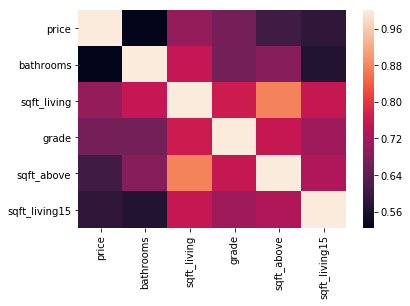

In [8]:
sn.heatmap(n.corr())
plt.show()

In [9]:
n.count()

price            21613
bathrooms        21613
sqft_living      21613
grade            21613
sqft_above       21613
sqft_living15    21613
dtype: int64

In [10]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [11]:
n.describe()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,3.671272e+05,0.770163,918.440897,1.175459,828.090978,685.391304
min,7.500000e+04,0.000000,290.000000,1.000000,290.000000,399.000000
25%,3.219500e+05,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,4.500000e+05,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,6.450000e+05,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,7.700000e+06,8.000000,13540.000000,13.000000,9410.000000,6210.000000


In [220]:
z1 = n['bathrooms'].quantile(0.25) # 1427
z2 = n['bathrooms'].quantile(0.75) # 2550
iqr = z2-z1 #1123
fence_low = z1-(1.5*iqr) #-257.5
fence_high = z2+(1.5*iqr) #-4234.5
print(fence_low)
print(fence_high)
#x = n.loc[(n['sqft_above']>fence_low) & (n['sqft_above'] < fence_high)]
#x.count()

# sqft_above = (-340***3740)
# sqft_living = (-257.5***4234.5)
# grade = (5.5***9.5)
# sqft_living15 = (185***3665)
# bathrooms = (0.625***3.625)


0.625
3.625


In [75]:
x = remove_outlier(n,'grade')
x = remove_outlier(x,'bathrooms')
x = remove_outlier(x,'sqft_living15')
x = remove_outlier(x,'sqft_above')
x = remove_outlier(x,'sqft_living')
x.count()

price            18850
bathrooms        18850
sqft_living      18850
grade            18850
sqft_above       18850
sqft_living15    18850
dtype: int64

<Figure size 720x720 with 0 Axes>

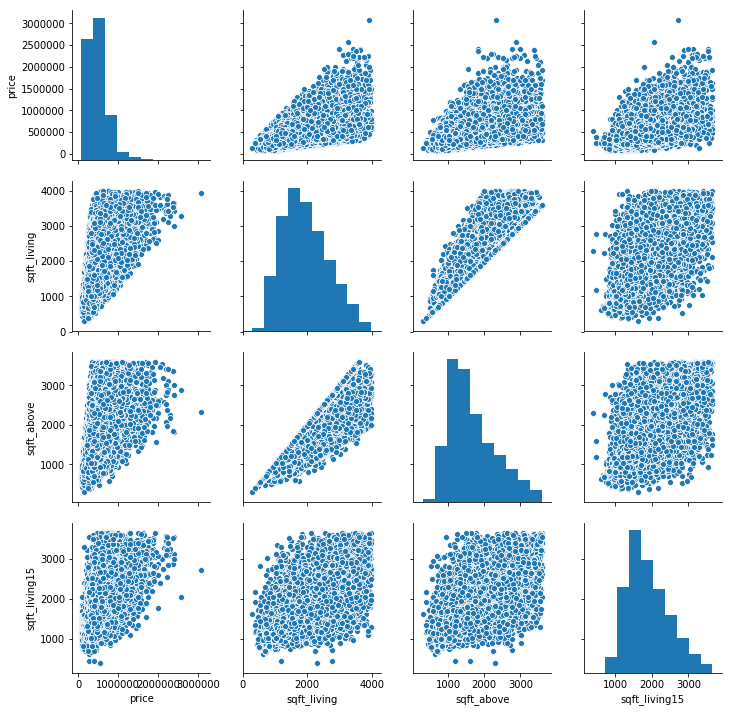

In [261]:
plt.figure(figsize=(10,10))
sn.pairplot(x)

In [13]:
x.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


In [76]:
y = x['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [77]:
x.drop(['price'], inplace=True, axis=1)
x.columns

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 123)

In [79]:
lm = lin_reg()
lm = lm.fit(x_train,y_train)
lm.intercept_
lm.coef_

array([-2.83048934e+04,  1.59137002e+02,  9.79802123e+04, -8.31623364e+01,
        4.81392365e+01])

In [80]:
y_pred = lm.predict(x_test)
y1_pred = lm.predict(x_train)

In [88]:
print("Test - Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Test - Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Test - Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Test - Mean absolute error (MAE): 123941.53620094106
Test - Mean square error (MSE): 27408676661.133698
Test - Root mean square error (RMSE): 165555.6603113699


In [89]:
print("Train - Mean absolute error (MAE):", metrics.mean_absolute_error(y_train,y1_pred))
print("Train - Mean square error (MSE):", metrics.mean_squared_error(y_train,y1_pred))
print("Train - Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_train,y1_pred)))

Train - Mean absolute error (MAE): 128510.96209556014
Train - Mean square error (MSE): 30309218010.35177
Train - Root mean square error (RMSE): 174095.4278846856


In [83]:
print("MAPE of train data is", np.mean(abs((y_train-y1_pred)/y_train))*100)
print("MAPE of test data is", np.mean(abs((y_test-y_pred)/y_test))*100)

MAPE of train data is 30.8232687496237
MAPE of test data is 30.24081531930916


In [84]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_pred),3))

R-squared value of predictions: 0.382


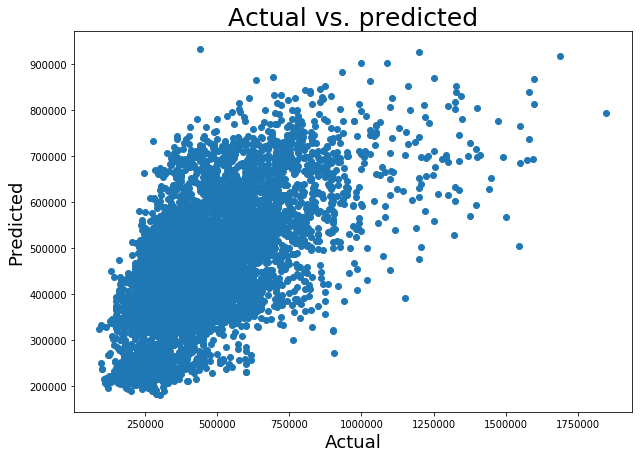

In [85]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted",fontsize=25)
plt.xlabel("Actual",fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.scatter(x=y_test,y=y_pred)

C:\Users\vaitnd\AppData\Local\Continuum\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


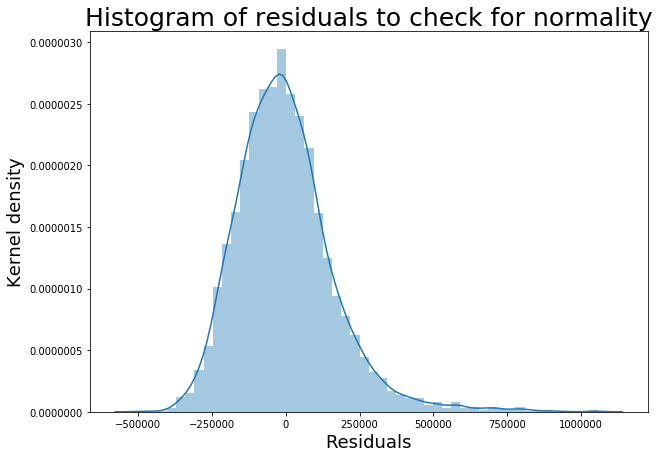

In [86]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sn.distplot([y_test-y_pred])

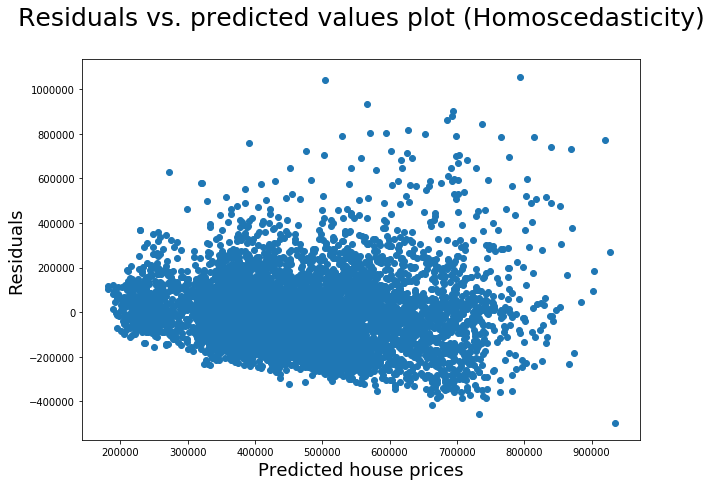

In [87]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=y_pred,y=y_test-y_pred)